In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
loan_df = pd.read_csv("loan.csv",low_memory=False)

In [3]:
loan_df.shape

(39717, 111)

In [4]:
loan_df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan = loan_df

In [7]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
missing_columns = loan.columns[loan.isna().sum()/len(loan.index) *100 > 90]

In [9]:
len(missing_columns)

56

In [10]:
loan = loan.drop(missing_columns, axis=1)

In [11]:
loan.shape

(39717, 55)

In [12]:
loan.isna().sum()/len(loan.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
loan[['desc',"mths_since_last_delinq"]]

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
...,...,...
39712,Our current gutter system on our home is old a...,0.0
39713,The rate of interest and fees incurred by carr...,5.0
39714,NaN,0.0
39715,NaN,0.0


In [14]:
loan = loan.drop(['mths_since_last_delinq','desc'],axis=1)

In [15]:
loan.isna().sum()/len(loan.index)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [18]:
loan['int_rate'] = loan['int_rate'].str.replace("%","").astype(float)

In [19]:
loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [20]:
loan['emp_length'].isna().sum()

1075

In [21]:
emp_len_ms_va = loan[loan['emp_length'].isnull()].index

In [22]:
loan.shape

(39717, 53)

In [23]:
39717-1075

38642

In [24]:
loan = loan[~loan['emp_length'].isnull()]

In [25]:
import re

In [26]:
loan["emp_length"] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [27]:
loan['emp_length'] = loan['emp_length'].astype(int)

In [28]:
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [29]:
# i want to take "fully paid" and "chared off"

In [30]:
loan = loan[loan['loan_status']!="Current"]

In [31]:
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [32]:
loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 37544, dtype: object

In [33]:
from datetime import datetime

In [34]:
### feature engineering

In [35]:
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [36]:
loan["isd_month"] = loan['issue_d'].apply(lambda x:x.month)
loan["isd_year"] = loan['issue_d'].apply(lambda x:x.year)

In [37]:
loan['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 37544, dtype: object

In [38]:
loan['revol_util'] = loan['revol_util'].str.replace("%","").astype(float)

In [39]:
loan['revol_util']

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 37544, dtype: float64

In [40]:
loan['pymnt_plan'].unique()      # not needed

array(['n'], dtype=object)

In [41]:
loan['earliest_cr_line']     # not needed 

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
5        Nov-04
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 37544, dtype: object

In [42]:
loan['initial_list_status'].unique()    # not needed

array(['f'], dtype=object)

In [43]:
loan['out_prncp_inv'].unique()        # not needed

array([0.])

In [44]:
loan['last_pymnt_d']     # date time # year and # month

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
5        Jan-15
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 37544, dtype: object

In [45]:
loan['collections_12_mths_ex_med'].unique()     # not needed

array([ 0., nan])

In [46]:
loan['policy_code'].unique()                    # not needed

array([1], dtype=int64)

In [47]:
loan['application_type'].unique()              # not needed

array(['INDIVIDUAL'], dtype=object)

In [48]:
loan['acc_now_delinq'].unique()                # not needed

array([0], dtype=int64)

In [49]:
loan['delinq_amnt'].unique()                  # not needed

array([0], dtype=int64)

In [51]:
loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [52]:
loan['tax_liens'].unique()                  # not needed

array([ 0., nan])

In [53]:
req_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
     'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens', 'isd_month', 'isd_year',
            'loan_status']

In [54]:
loan[req_cols].to_csv("loan-processed.csv",index=False)

In [55]:
new_data = pd.read_csv("loan-processed.csv")

In [56]:
new_data.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   47
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
chargeoff_within_12_mths     56
pub_rec_bankruptcies        697
tax_lien

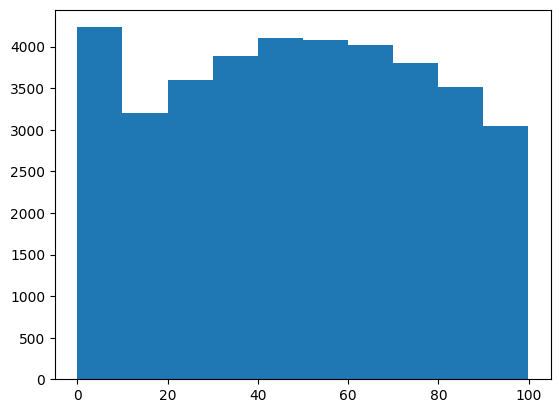

In [57]:
plt.hist(new_data['revol_util'])
plt.show()

In [58]:
median_ru = new_data['revol_util'].median()
new_data['revol_util'] = new_data['revol_util'].fillna(median_ru)

In [59]:
new_data['revol_util'].isna().sum()

0

In [60]:
new_data = new_data.drop("chargeoff_within_12_mths",axis=1)

In [61]:
new_data.isna().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
purpose                      0
dti                          0
delinq_2yrs                  0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveries                   0
collection_recovery_fee      0
last_pymnt_amnt              0
pub_rec_bankruptcies       697
tax_liens                   39
isd_month                    0
isd_year

In [62]:
new_data['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [63]:
new_data['pub_rec_bankruptcies'].dtype

dtype('float64')

In [64]:
new_data['pub_rec_bankruptcies'] = new_data['pub_rec_bankruptcies'].fillna(0)

In [65]:
new_data['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

In [66]:
new_data['pub_rec_bankruptcies'].dtype

dtype('float64')

In [67]:
new_data.isna().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
purpose                     0
dti                         0
delinq_2yrs                 0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
pub_rec_bankruptcies        0
tax_liens                  39
isd_month                   0
isd_year                    0
loan_statu

In [68]:
new_data['tax_liens'].unique()

array([ 0., nan])

In [69]:
new_data = new_data.drop("tax_liens",axis=1)

In [70]:
new_data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
isd_month                  0
isd_year                   0
loan_status                0
dtype: int64

In [71]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  object 
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_length               37544 non-null  int64  
 9   home_ownership           37544 non-null  object 
 10  annual_inc               37544 non-null  float64
 11  verification_status      37544 non-null  object 
 12  purpose                  37544 non-null  object 
 13  dti                      37544 non-null  float64
 14  delinq_2yrs           

In [72]:
new_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [73]:
new_data["term"] = new_data['term'].map({' 36 months':36,' 60 months':60})

In [74]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  int64  
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_length               37544 non-null  int64  
 9   home_ownership           37544 non-null  object 
 10  annual_inc               37544 non-null  float64
 11  verification_status      37544 non-null  object 
 12  purpose                  37544 non-null  object 
 13  dti                      37544 non-null  float64
 14  delinq_2yrs           

In [75]:
new_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data["grade"] = le.fit_transform(new_data['grade'])

In [77]:
new_data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [78]:
new_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [79]:
new_data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [80]:
new_data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [81]:
new_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'isd_month', 'isd_year', 'loan_status'],
      dtype='object')

In [82]:
new_data.shape

(37544, 33)

In [83]:
x = new_data.drop("loan_status",axis=1)
y = new_data['loan_status']

In [84]:
x['grade']

0        1
1        2
2        2
3        2
4        0
        ..
37539    0
37540    2
37541    0
37542    0
37543    4
Name: grade, Length: 37544, dtype: int32

In [85]:
x = pd.get_dummies(x)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:

x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                    test_size=0.2,random_state=134)

### Decision trees, Bagging classifier, Random forest

In [88]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [89]:
y_pred

array(['Charged Off', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [90]:
confusion_matrix(y_test, y_pred)

array([[1091,   32],
       [  28, 6358]], dtype=int64)

In [91]:
accuracy_score(y_test, y_pred)

0.9920095884938074

In [92]:
base = DecisionTreeClassifier()
bg = BaggingClassifier(base_estimator=base , n_estimators=50)
bg.fit(x_train, y_train)
y_pred = bg.predict(x_test)

In [93]:
y_pred

array(['Charged Off', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [94]:
accuracy_score(y_test, y_pred)

0.9956052736715941

In [95]:
confusion_matrix(y_test, y_pred)

array([[1090,   33],
       [   0, 6386]], dtype=int64)

In [96]:
rf = RandomForestClassifier(max_depth = 16, n_estimators=150)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [97]:
confusion_matrix(y_test, y_pred)

array([[1077,   46],
       [   0, 6386]], dtype=int64)

In [98]:
accuracy_score(y_test, y_pred)

0.9938740178452523

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
dt = DecisionTreeClassifier()
cv_results = cross_val_score(dt, x, y, cv = 5, scoring="accuracy")
cv_results.mean()

0.9914764828822354

In [113]:
bg = BaggingClassifier(base_estimator=base, n_estimators= 150)
cv_results = cross_val_score(bg, x, y, cv = 5, scoring="accuracy")
cv_results.mean()

0.9956316706934452

In [112]:
rt = RandomForestClassifier()

cv_results = cross_val_score(rt, x, y, cv = 5, scoring="accuracy")
cv_results.mean()

0.9942466270097621

# Scaling

In [101]:
num_cols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment','emp_length','annual_inc','dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'isd_month', 'isd_year']

In [102]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x.loc[:,num_cols]=sc.fit_transform(x[num_cols])

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
y_pred

array(['Charged Off', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [105]:
accuracy_score(y_test,y_pred)

0.9938740178452523

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [108]:
accuracy_score(y_test,y_pred)

0.9483286722599548

In [109]:
from sklearn.svm import SVC

In [110]:
sv=SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)

In [111]:
accuracy_score(y_test,y_pred)

0.9722999067785324